In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cols=['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration', 'model year', 'origin','car name']
df = pd.read_csv("data/auto-mpg.data", delim_whitespace=True, names=cols)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15860\2307928382.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("data/auto-mpg.data", delim_whitespace=True, names=cols)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

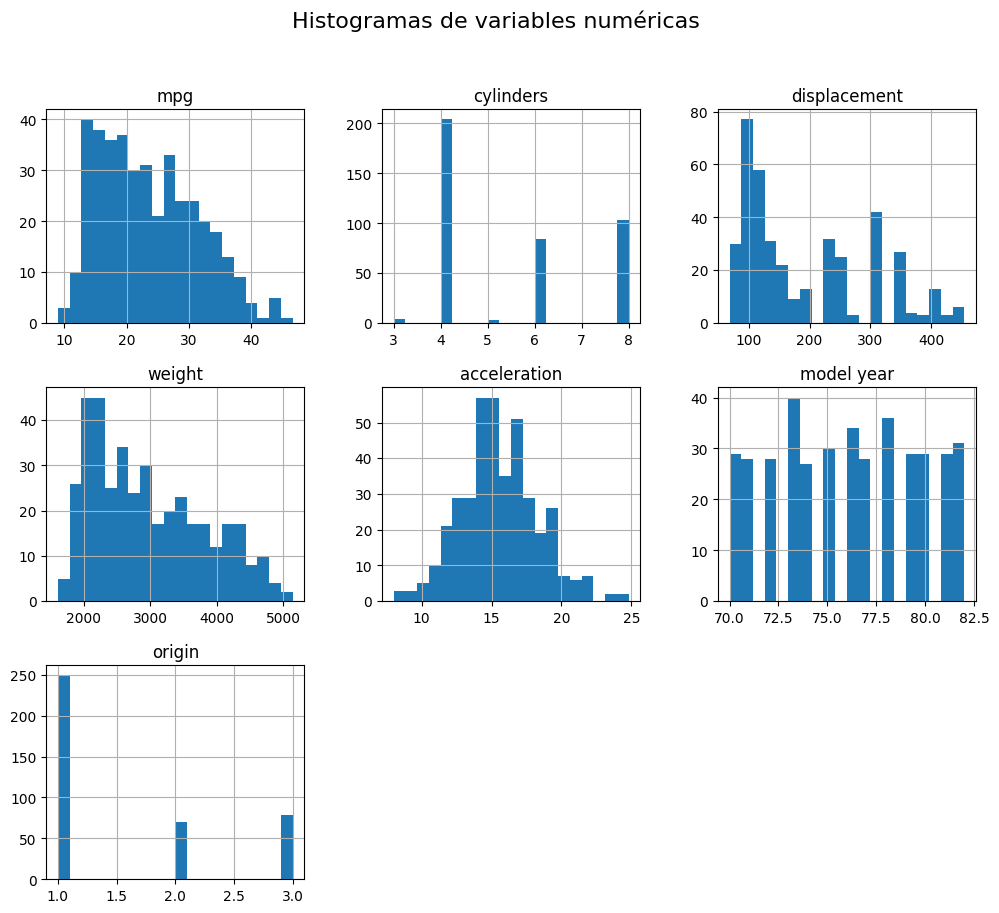

In [14]:
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.show()

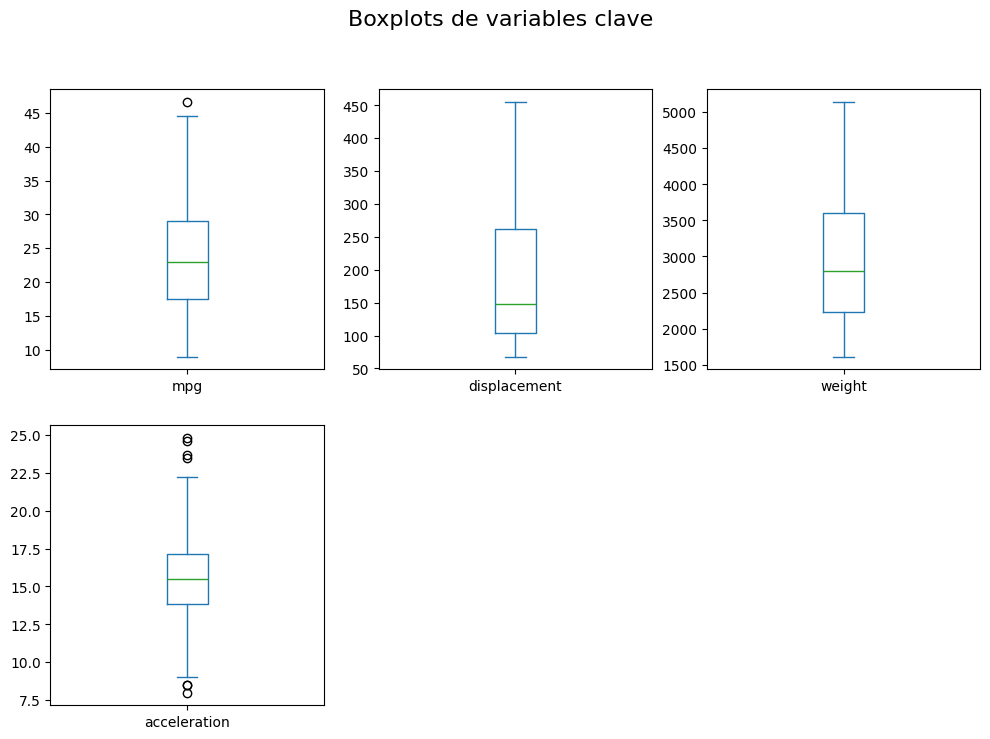

In [15]:
df[["mpg","displacement","horsepower","weight","acceleration"]].plot(kind="box", subplots=True, layout=(2,3), figsize=(12,8))
plt.suptitle("Boxplots de variables clave", fontsize=16)
plt.show()

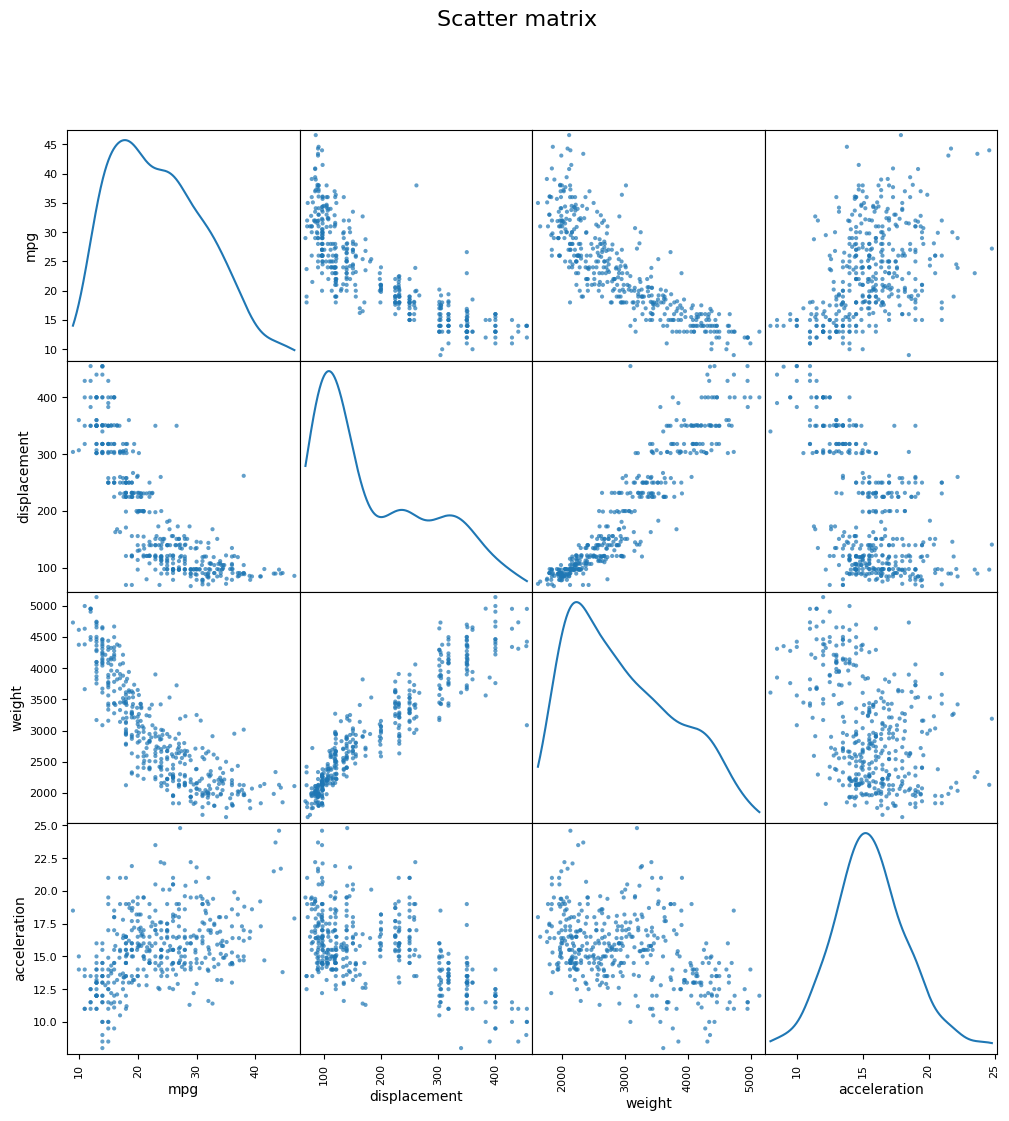

In [16]:
pd.plotting.scatter_matrix(df[["mpg","displacement","horsepower","weight","acceleration"]], 
                           figsize=(12,12), diagonal="kde", alpha=0.7)
plt.suptitle("Scatter matrix", fontsize=16)
plt.show()


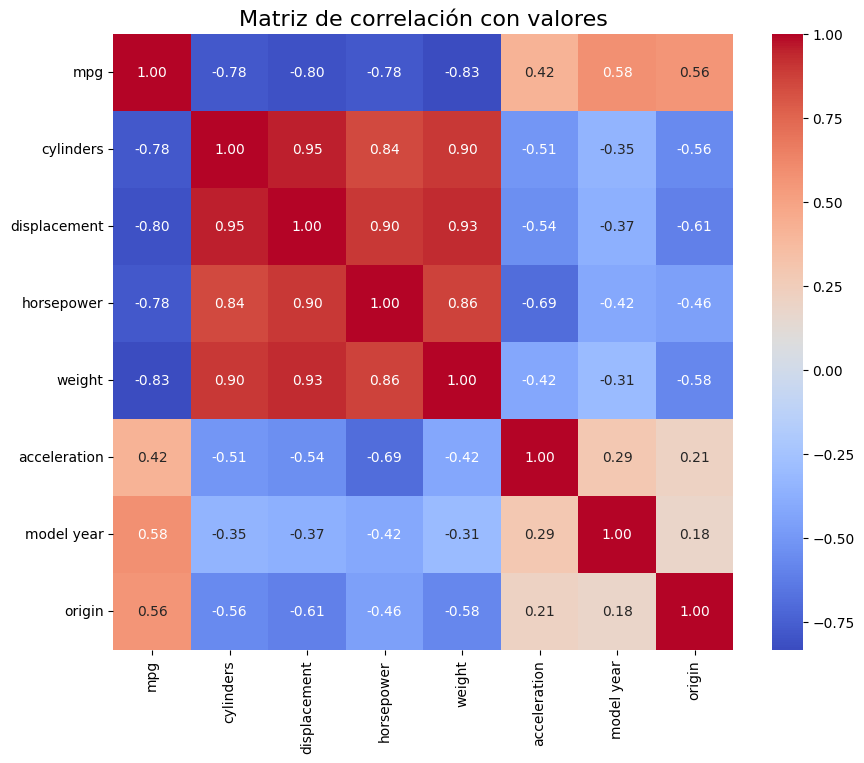

In [27]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title("Matriz de correlación con valores", fontsize=16)
plt.show()

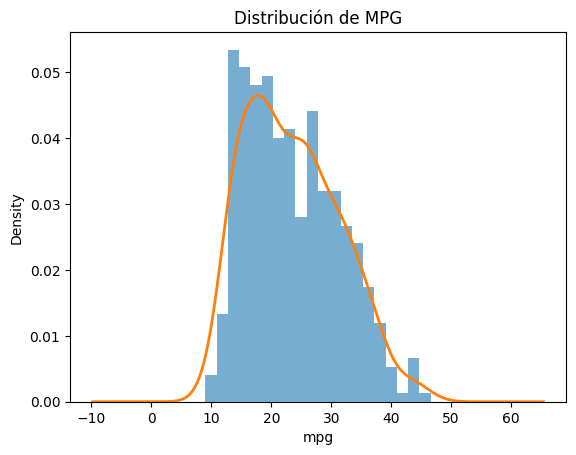

In [18]:
df["mpg"].plot(kind="hist", bins=20, density=True, alpha=0.6)
df["mpg"].plot(kind="kde", linewidth=2)
plt.title("Distribución de MPG")
plt.xlabel("mpg")
plt.show()


la columna horsepower todavía tiene valores como string (porque tenía "?" en los datos originales)

In [22]:
# Asegurar tipos numéricos
numeric_cols = ["mpg","displacement","horsepower","weight","acceleration"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

#  Outliers con IQR 
print(" Outliers por IQR")
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


 Outliers por IQR
mpg: 1 outliers
displacement: 0 outliers
horsepower: 10 outliers
weight: 0 outliers
acceleration: 7 outliers


In [24]:
print(" Correlación con mpg")
print(corr["mpg"].sort_values(ascending=False))

 Correlación con mpg
mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64
